In [57]:
#import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Set the style as seaborn
#Same as plt.style.use('seaborn')
#plt.style.use('seaborn-whitegrid')
sns.set()
%matplotlib inline
import numpy as np

In [58]:
#Read the data.csv file which contains the data
#Parse the column 'Date' as date
df = pd.read_csv('data.csv', parse_dates=['Date'])

In [59]:
#Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441197 entries, 0 to 3441196
Data columns (total 7 columns):
Position      int64
Track Name    object
Artist        object
Streams       int64
URL           object
Date          datetime64[ns]
Region        object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 183.8+ MB


In [60]:
#Output the first four rows
df[:4]

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec


In [62]:
#Get the top ten songs
#which occupied the most times position 1
top_10_songs_by_position = df[df['Position'] == 1]['Track Name'].value_counts()[:10]
top_10_songs_by_position

Shape of You                          3639
Despacito - Remix                     2342
rockstar                              1690
Despacito (Featuring Daddy Yankee)    1560
Mi Gente                              1180
Felices los 4                          818
Criminal                               416
Look What You Made Me Do               299
Me Rehúso                              291
Sensualidad                            289
Name: Track Name, dtype: int64

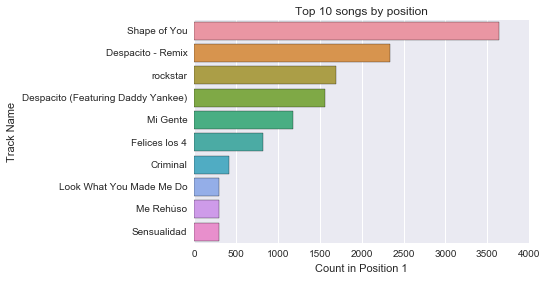

In [64]:
#plot a simple barplot to visualize the above statement
plt.ylabel('Track Name')
plt.xlabel('Count in Position 1')
plt.title('Top 10 songs by position')
sns.barplot(x=top_10_songs_by_position.values, y=top_10_songs_by_position.index)

In [65]:
#get top 10 songs based on streams in a single day

In [66]:
top_10_by_streams_on_single_day = df.sort_values(by='Streams',ascending=False)[:10]
top_10_by_streams_on_single_day[['Position','Track Name','Artist','Streams','Date']]

,Position,Track Name,Artist,Streams,Date
3145443,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,11381520,2017-05-27
3128643,1,Shape of You,Ed Sheeran,9891056,2017-03-03
3145643,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,9849173,2017-05-28
3128843,1,Shape of You,Ed Sheeran,9603434,2017-03-04
3129243,1,Shape of You,Ed Sheeran,8900049,2017-03-07
3129843,1,Shape of You,Ed Sheeran,8849461,2017-03-10
3129443,1,Shape of You,Ed Sheeran,8738426,2017-03-08
3129643,1,Shape of You,Ed Sheeran,8695555,2017-03-09
3130043,1,Shape of You,Ed Sheeran,8664792,2017-03-11
3145243,1,Despacito - Remix,Luis Fonsi,8525474,2017-05-26


In [67]:
#get top 10 songs based on streams from the overall data

In [68]:
top_10_songs_by_stream_overall = df.groupby('Track Name')['Streams'].sum().sort_values(ascending=False)[:10]
top_10_songs_by_stream_overall

Track Name
Shape of You                          2993988783
Despacito - Remix                     1829621841
Despacito (Featuring Daddy Yankee)    1460802540
Something Just Like This              1386258295
Unforgettable                         1366919951
HUMBLE.                               1311243745
rockstar                              1260181617
I'm the One                           1254196301
It Ain't Me (with Selena Gomez)       1190339348
XO TOUR Llif3                         1171827725
Name: Streams, dtype: int64

In [69]:
#plot the above data

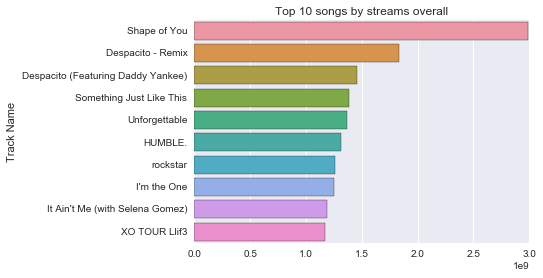

In [70]:
plt.title('Top 10 songs by streams overall')
sns.barplot(x=top_10_songs_by_stream_overall.values, y=top_10_songs_by_stream_overall.index)

In [71]:
#analyze the top two songs with the most streams
analyze_top_songs = df.copy()

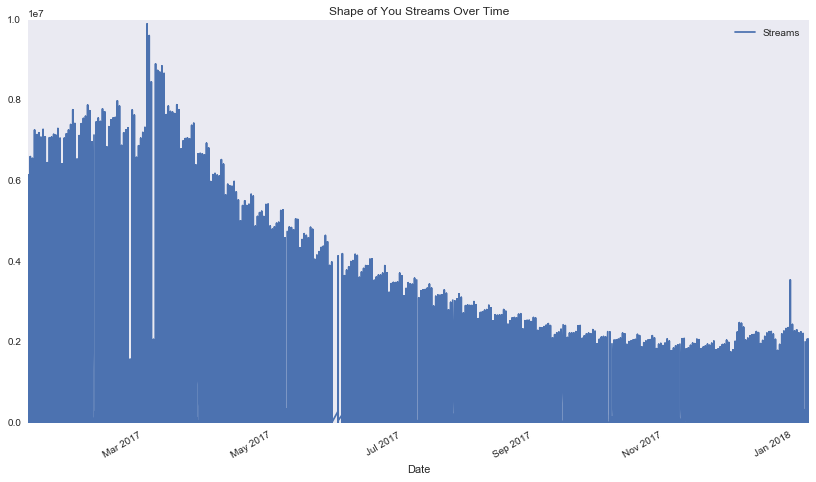

In [72]:
shape_of_you = analyze_top_songs[analyze_top_songs['Track Name'] == 'Shape of You']
shape_of_you = shape_of_you.set_index('Date')
shape_of_you = shape_of_you[['Streams','Track Name']]
shape_of_you.plot(title='Shape of You Streams Over Time',figsize=(14,8), grid=False)

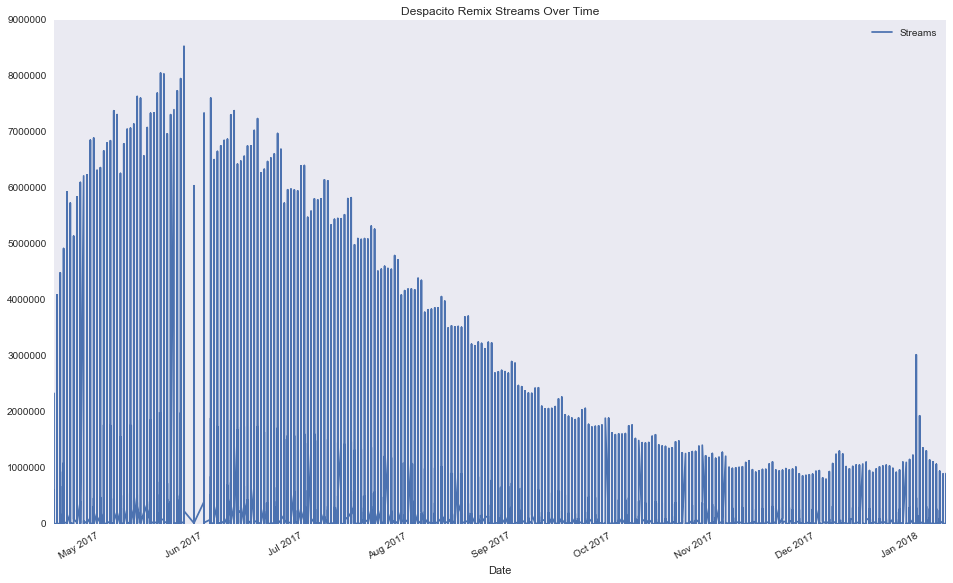

In [73]:
despacito = analyze_top_songs[analyze_top_songs['Track Name'] == 'Despacito - Remix']
despacito = despacito.set_index('Date')
despacito = despacito[['Streams', 'Track Name']]
despacito.plot(title='Despacito Remix Streams Over Time', figsize=(16,10), grid=False)

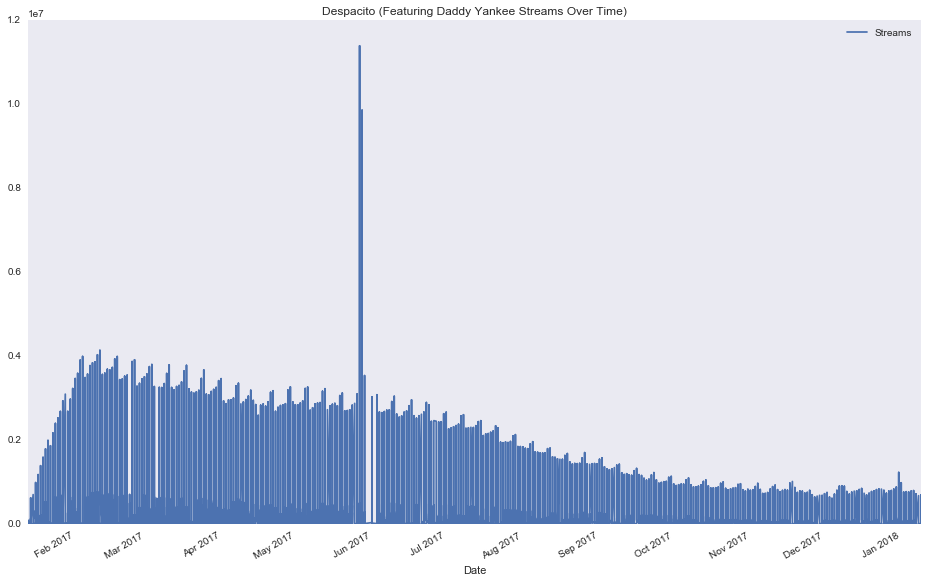

In [74]:
#Despacito (Featuring Daddy Yankee)
#Song with the highest streams on a single day
despacito_original= analyze_top_songs[analyze_top_songs['Track Name'] == 'Despacito (Featuring Daddy Yankee)']
despacito_original = despacito_original.set_index('Date')
despacito_original = despacito_original[['Streams', 'Track Name']]
despacito_original.plot(title='Despacito (Featuring Daddy Yankee Streams Over Time)', figsize=(16,10), grid=False)

In [75]:
#filter the 2018 data
#make copy our data
df_copy = df.copy()

In [76]:
#set the 'Date' column as the index

In [77]:
df_copy.set_index('Date', inplace=True, drop=True)

In [78]:
df_2018 = df_copy[df_copy.index.year == 2018]

In [79]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84711 entries, 2018-01-01 to 2018-01-09
Data columns (total 6 columns):
Position      84711 non-null int64
Track Name    84711 non-null object
Artist        84711 non-null object
Streams       84711 non-null int64
URL           84711 non-null object
Region        84711 non-null object
dtypes: int64(2), object(4)
memory usage: 4.5+ MB


In [80]:
df_2018[:4]

,Position,Track Name,Artist,Streams,URL,Region
Date,,,,,,
2018-01-01,1,Échame La Culpa,Luis Fonsi,26459,https://open.spotify.com/track/1zsG4eaZmkA1dvj...,ec
2018-01-01,2,Corazón,Maluma,25743,https://open.spotify.com/track/4lESS6vuruP6a79...,ec
2018-01-01,3,Déjala Que Vuelva (feat. Manuel Turizo),Piso 21,24315,https://open.spotify.com/track/33bnxcjePIkcmNj...,ec
2018-01-01,4,Criminal,Natti Natasha,22060,https://open.spotify.com/track/6Za3190Sbw39BBC...,ec


In [81]:
#get the top 2018 songs

In [82]:
top_2018_songs = df_2018['Track Name'].value_counts()[:10]

In [83]:
top_2018_songs

Havana                                 475
Perfect                                466
Gucci Gang                             466
New Rules                              466
Wolves                                 466
What Lovers Do (feat. SZA)             466
rockstar                               466
Shape of You                           464
Dusk Till Dawn - Radio Edit            462
Perfect Duet (Ed Sheeran & Beyoncé)    461
Name: Track Name, dtype: int64

In [84]:
#get the top 10 regions that havethe most streams

In [85]:
streams_by_region = df.groupby('Region')['Streams'].sum().sort_values(ascending=False)[:10]
streams_by_region

Region
global    76852243776
us        26384680151
gb         7185860296
br         6890194505
mx         6344670992
de         6072757512
es         3754247012
nl         3467630881
au         3372128479
se         3367838798
Name: Streams, dtype: int64

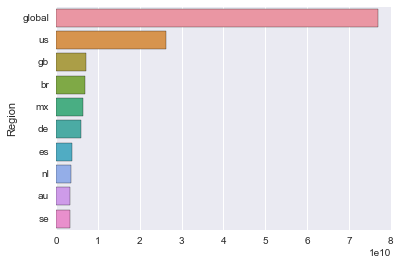

In [86]:
sns.barplot(x=streams_by_region.values, y=streams_by_region.index)

In [87]:
#add a month column

In [88]:
df['month'] = df['Date'].dt.month

In [89]:
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region',
       'month'],
      dtype='object')

In [90]:
df = df.set_index('Date', drop=True,)
df_2017 = df[df.index.year == 2017]

In [91]:
#get streams based on months

In [92]:
#map int dates into date in full

In [93]:
mappings ={1:'Jan', 2:'Feb',3:'Mar', 4:'Apr',5:'May', 6:'Jun',7:'Jul',8:'Aug',9:'Sep', 10:'Oct',11:'Nov',
    12:'Dec'   
}
f = lambda x: mappings.get(x,x)
df_2017.month = df_2017.month.apply(f)

c:\python35\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [94]:
streams_based_on_months_2017 = df_2017.groupby('month')['Streams'].sum()
sorted_streams_based_on_months_2017 = streams_based_on_months_2017.sort_values(ascending=False)
sorted_streams_based_on_months_2017

month
Dec    16387348074
Mar    15547019052
Oct    15063803541
Jul    14865263239
Sep    14820585163
Nov    14682201305
Aug    14619134413
Apr    14595379550
May    14518200794
Jun    14236839633
Jan    12660800375
Feb    12286996626
Name: Streams, dtype: int64

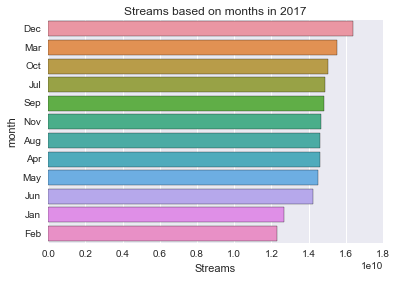

In [95]:
plt.title('Streams based on months in 2017')
plt.xlabel('Streams')
sns.barplot(x=sorted_streams_based_on_months_2017.values, y=sorted_streams_based_on_months_2017.index)

In [96]:
#top 10 artists with the most streams
df.groupby('Artist')['Streams'].sum().sort_values(ascending=False)[:10]

Artist
Ed Sheeran          8913973976
Drake               4523630992
The Chainsmokers    4292590087
Post Malone         3700404149
Kendrick Lamar      3570665303
Luis Fonsi          3555514919
J Balvin            2494735971
Calvin Harris       2397708371
Imagine Dragons     2322921399
DJ Khaled           2236224259
Name: Streams, dtype: int64

In [97]:
#top 10 artists whose song(s) became position 1 the most times
top_10_artists_by_songs_position =df[df['Position'] == 1]['Artist'].value_counts()[:10]
top_10_artists_by_songs_position 

Luis Fonsi        4085
Ed Sheeran        3780
Post Malone       1737
J Balvin          1195
Maluma             900
Natti Natasha      416
Bad Bunny          311
Taylor Swift       304
Danny Ocean        291
Camila Cabello     272
Name: Artist, dtype: int64

In [98]:
top_artists = list(top_10_artists_by_songs_position.index)
top_artists

['Luis Fonsi',
 'Ed Sheeran',
 'Post Malone',
 'J Balvin',
 'Maluma',
 'Natti Natasha',
 'Bad Bunny',
 'Taylor Swift',
 'Danny Ocean',
 'Camila Cabello']

In [99]:
#get the number of songs this artist had
def get_number_of_songs():
    artist_num_songs = []
    for i in range(len(top_artists)):
        artist = top_artists[i]
        number_of_songs = len(df[df.Artist == artist]['Track Name'].unique())
        artist_num_songs.append(artist+' : '+str(number_of_songs))
    return artist_num_songs

In [100]:
get_number_of_songs()

['Luis Fonsi : 5',
 'Ed Sheeran : 60',
 'Post Malone : 12',
 'J Balvin : 15',
 'Maluma : 18',
 'Natti Natasha : 1',
 'Bad Bunny : 16',
 'Taylor Swift : 33',
 'Danny Ocean : 4',
 'Camila Cabello : 9']

In [101]:
#get the songs of this top artists that have became position 1

In [102]:
def get_top_songs_of_the_top_artists():
    top_songs_of_the_top_artists = []
    for i in range(len(top_artists)):
        artist = top_artists[i]
        songs = df[(df.Artist == artist) & (df.Position == 1)]['Track Name'].unique()
        count = df[(df.Artist == artist) & (df.Position == 1)]['Track Name'].value_counts()
        songs_count = list(zip(songs,count))
        top_songs_of_the_top_artists.append((artist,songs_count))      
    return top_songs_of_the_top_artists

In [103]:
top_songs_of_top_artist = get_top_songs_of_the_top_artists()

In [104]:
top_songs_of_top_artist

[('Luis Fonsi',
  [('Despacito (Featuring Daddy Yankee)', 2342),
   ('Despacito - Remix', 1560),
   ('Échame La Culpa', 183)]),
 ('Ed Sheeran',
  [('Shape of You', 3639),
   ('Perfect', 76),
   ('Castle on the Hill', 46),
   ('Perfect Duet (Ed Sheeran & Beyoncé)', 15),
   ('Galway Girl', 4)]),
 ('Post Malone', [('rockstar', 1690), ('I Fall Apart', 47)]),
 ('J Balvin', [('Mi Gente', 1180), ('Bonita', 15)]),
 ('Maluma', [('Felices los 4', 818), ('Corazón', 82)]),
 ('Natti Natasha', [('Criminal', 416)]),
 ('Bad Bunny', [('Sensualidad', 289), ('Soy Peor', 18), ('Chambea', 4)]),
 ('Taylor Swift',
  [('Look What You Made Me Do', 299),
   ('...Ready For It?', 3),
   ('Gorgeous', 2)]),
 ('Danny Ocean', [('Me Rehúso', 291)]),
 ('Camila Cabello', [('Havana', 272)])]

In [105]:
#this in the format of 
#artist,(Track Name,count of number of times in position1)
#in the below output artist:'Luis Fonsi'(Track Name:'Despacito (Featuring Daddy Yankee)', numberof times in pos 1:'2342')
top_songs_of_top_artist[0]

('Luis Fonsi',
 [('Despacito (Featuring Daddy Yankee)', 2342),
  ('Despacito - Remix', 1560),
  ('Échame La Culpa', 183)])